In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Make Simulations

In [2]:
# simulation settings
n = 100
np.random.seed(1)

def frontier(x):
    intercept, slope = 1.5, 5
    return np.log(intercept + slope * x)

ineff = 0.4

x_domain = [0, 10]
sample_size_1 = [1000, 0.7]
sample_size_2 = [1000, 0.3]

In [3]:
def simulate():
    x = np.random.uniform(low=x_domain[0], high=x_domain[1], size=n)
    sample_sizes_1 = np.random.negative_binomial(
        n=sample_size_1[0], p=sample_size_1[1], size=int(n / 2)
    )
    sample_sizes_2 = np.random.negative_binomial(
        n=sample_size_2[0], p=sample_size_2[1], size=int(n / 2)
    )
    sample_sizes = np.append(sample_sizes_1, sample_sizes_2)
    
    the_frontier = frontier(x)
    inefficiency = np.random.exponential(ineff, size=n)
    means = the_frontier - inefficiency
    samples = [np.random.normal(m, scale=4, size=s) for m, s in zip(means, sample_sizes)]
    est_means = np.array([np.mean(s) for s in samples])
    est_sterr = np.array([np.sqrt(np.sum(sum((s - np.mean(s))**2)) / ((len(s) - 1)))/np.sqrt(len(s)) for s in samples])
    df = pd.DataFrame({
        'output': est_means,
        'se': est_sterr,
        'input': x,
        'ones': np.ones(len(x)),
        'frontier': the_frontier,
        'truth': means,
        'sample_size': sample_sizes
    })
    return df

In [4]:
sim = simulate()

In [5]:
the_frontier = sim['frontier']
linspace = np.linspace(x_domain[0], x_domain[1])
front = frontier(linspace)

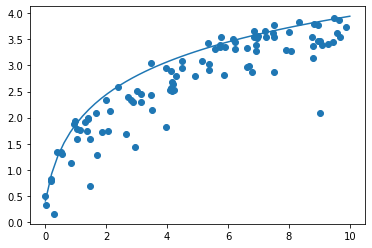

In [6]:
plt.plot(linspace, front, linestyle='solid')
plt.scatter(sim.input, sim.output)

<ErrorbarContainer object of 3 artists>

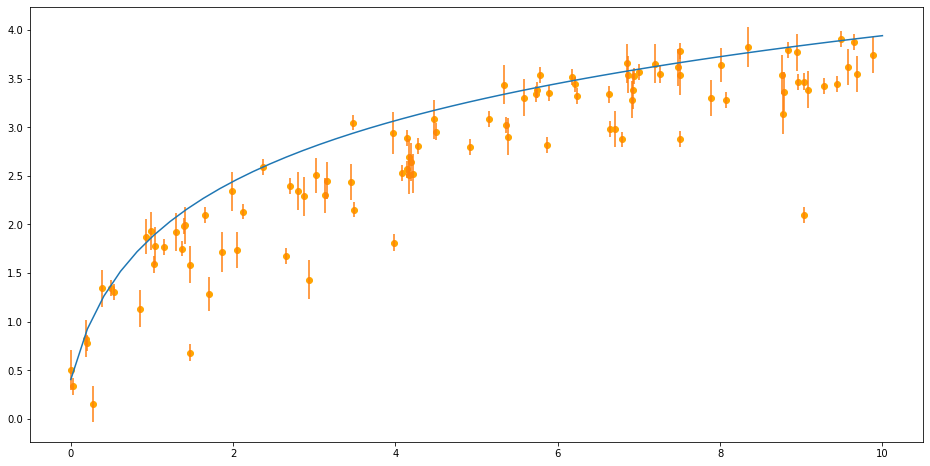

In [7]:
fig, ax = plt.subplots(1, 1, figsize=(16, 8))
ax.plot(linspace, front, linestyle='solid')
ax.scatter(sim.input, sim.output, color='orange')
ax.errorbar(sim.input, sim.output, yerr=sim.se, linestyle='None')